# The Softmax Function

In this notebook we will have a look at the softmax function, which is a very important function for classification tasks. A softmax function consumes a vector and turns it into a probability function.

$$
\text{softmax}: \text{logit vector} \rightarrow \text{probability scores}
$$

The softmax function is defined in the following way:

$$
s(\textbf{x})_i = \frac{e^{x_i}}{\sum\limits_{j=1}^k e^{x_j}}
$$

For example running a vector $\textbf{x} = \begin{pmatrix}2 & 5 & 3\end{pmatrix}^T$ through a softmax function results in the vector $\textbf{p} = \begin{pmatrix}0.042 & 0.844 & 0.114 \end{pmatrix}^T$

Let's explain this step by step:

The first components of the resulting vector is calculated the following way:

$$ p_1 = \frac{e^2}{e^2 + e^5 + e^3} = 0.042 $$

The second component:

$$ p_2 = \frac{e^5}{e^2 + e^5 + e^3} = 0.844 $$

And the third component:

$$ p_3 = \frac{e^3}{e^2 + e^5 + e^3} = 0.114 $$

You see that the denominator is always the same, only the nominator changes. If you sum all components of the resulting vector **p** you will **always get 1.0**, which makes the softmax function by definition a probability function.

In neural networks we use softmax functions as the last layer in classification problems. The neural networks learns the logits for each output class, which are then run through the softmax function to turn these logits into probability values. The softmax function guaranties that all probabilities for all classes sum up to one.

As the softmax function also can be derived it can be used in the backpropagation algorithm.
If you are interested in computing the derivative of the softmax function you can read the following article: https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1

Now let's implement the softmax function with numpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Your task is to define the softmax function using numpy. Have a look at the function `exp` of numpy when implementing the softmax function. Also thinnk of that you have to compute the denominator only once.

In [2]:
# First let's define a function that consumes a numpy array and returns the resulting probability vector
# when running it through a softmax function
def softmax(x: np.ndarray):
    # TODO implement this function
    denominator = np.exp(x).sum()
    return np.exp(x) / denominator

In [3]:
# Next run our sample vector through the softmax function
x = np.array([2, 5, 3])
p = softmax(x)
print("Output of Softmax:", p)

Output of Softmax: [0.04201007 0.84379473 0.1141952 ]


In [4]:
# Check that the sum of p is 1.0
print("Sum of all components of p:", p.sum())

Sum of all components of p: 1.0


## Deepen knowledge about the softmax function

You next task is to calculate the resulting vector when running the vector $\textbf{x} = \begin{pmatrix}-1.5 & 0.2 & 3.4 & -2.7\end{pmatrix}^T$ through the softmax function. Fill the missing computations below.

$$
p_1 = 
$$


$$
p_2 = 
$$

$$
p_3 = 
$$

$$
p_4 = 
$$

Next verify your results by running the vector through our own softmax implementation.

In [5]:
p = softmax(np.array([-1.5, 0.2, 3.4, -2.7]))
print("True results:", p)

True results: [0.00708893 0.03880446 0.95197146 0.00213515]


## Important characteristics of the softmax function

The softmax function is a non-linear function whcih means that when you have two components in a vector and the second component has twice the value of the first component that will not be the case in the resulting vector. To demonstrate this we will run a sequence of equally spaced values between zero and one through the softmax function and have a look at the results.

In [6]:
# linear, equally spaced values
x = np.array([-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
# resulting probability vector
p = softmax(x)

Text(0.5, 1.0, 'Output vector components')

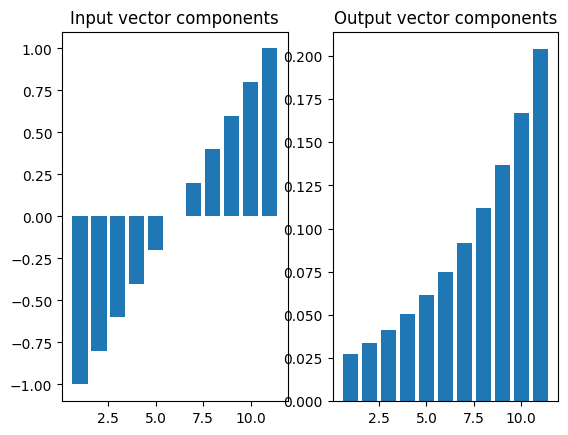

In [7]:
# Plot the inputs and outputs of the softmax function
fig, ax = plt.subplots(1, 2)
ax[0].bar(list(range(1,12)), x)
ax[0].set_title("Input vector components")
ax[1].bar(list(range(1,12)), p)
ax[1].set_title("Output vector components")

Here you can see the most important features of the softmax function:

- **Positivity**: all output components are positive and greater than zero
- **Monotony**: if an input component is larger than another input components the corresponding output component will also be larger than the output of the other component
- **Non-linearity**: Even if the inputs are linear the outputs of a softmax function are not
- **Probability function**: All output components sum up to 1.0 (or 100%)